#### Andrew Lui - 14 Dec 2020
#### Derived from resources by Rayan Slim & Programming Knowledge

## Static lane detection

### Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function definitions

In [2]:
# Canny edge detection
def canny(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# define region of interest
def roi(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    return mask

# extract ROI
def extract(image1, image2):
    mask = image1 & image2
    return mask

# display lines
def displayLines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

# smooth lines
def averageSlopeIntercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = makeCoordinates(image, left_fit_average)
    right_line = makeCoordinates(image, right_fit_average)
    return np.array([left_line, right_line])

def makeCoordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

### Read  and show original image

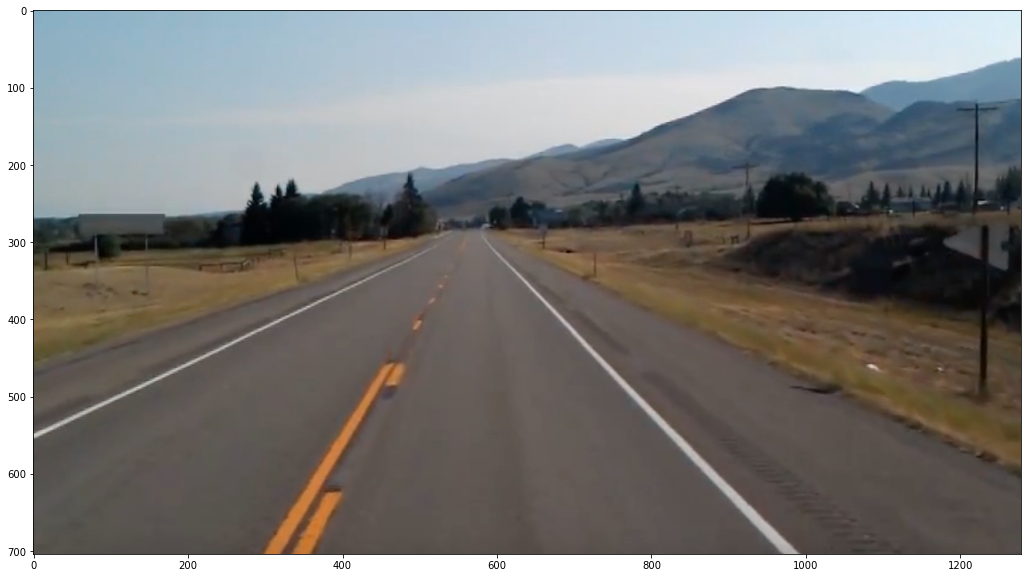

In [3]:
lanes = cv2.imread('test_image.jpg')
lanes = cv2.cvtColor(lanes, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (26, 10))
plt.imshow(lanes)
plt.show()

### Edge detection

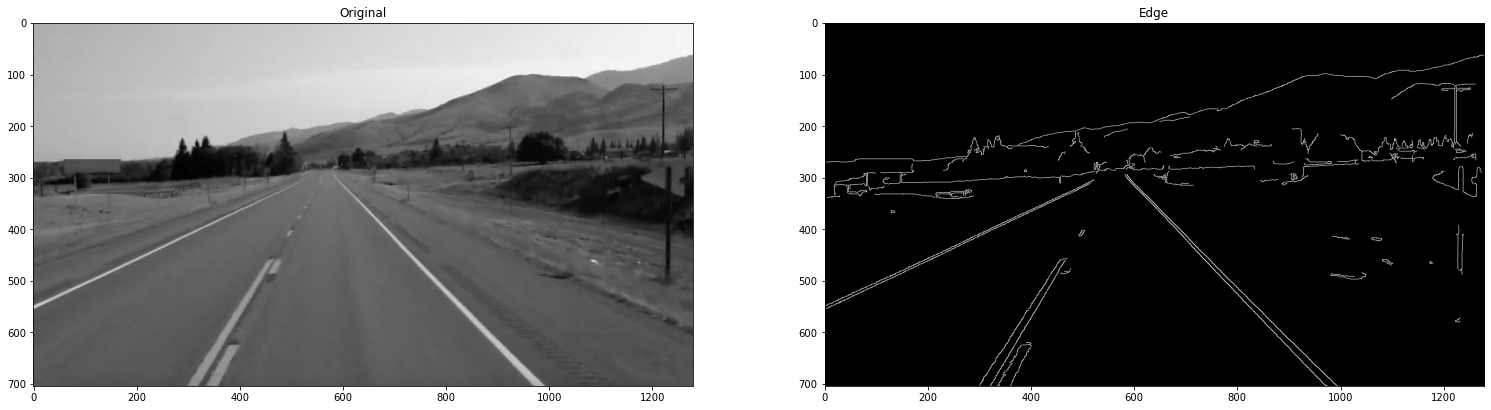

In [4]:

# get image in grayscale
lanes_gray = cv2.imread('test_image.jpg', cv2.IMREAD_GRAYSCALE) # read as grayscale

# call canny function
edges = canny(lanes_gray)

# plot figures
fig, (ax1, ax2) = plt.subplots(figsize = (26, 10), ncols = 2)
ax1.imshow(lanes_gray, cmap='gray'), ax1.set_title("Original")
ax2.imshow(edges, cmap='gray'), ax2.set_title("Edge")
plt.show()

### Region of interest

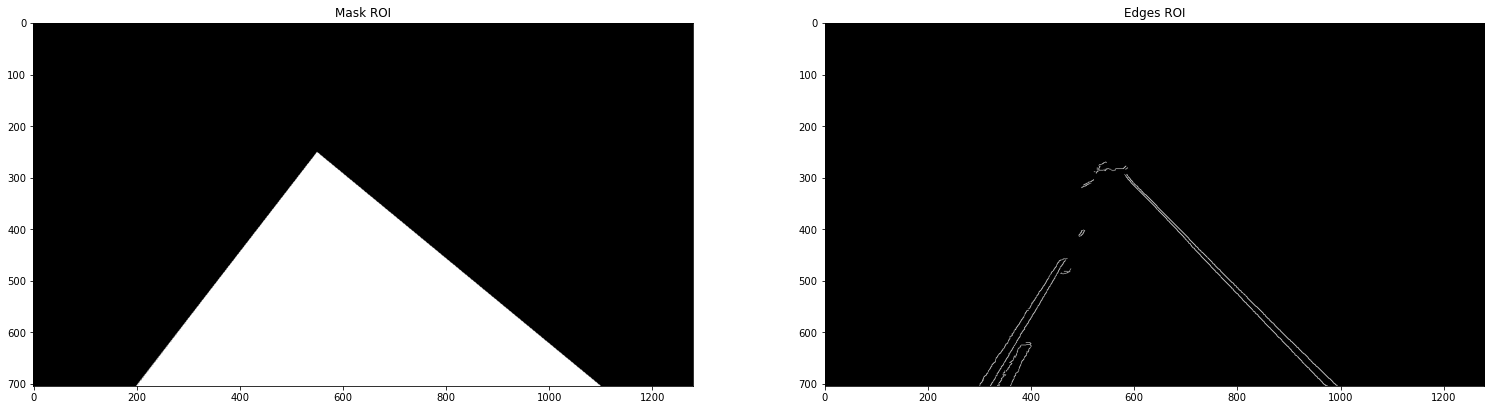

In [5]:
roi_mask = roi(edges)
lanes_masked = extract(edges, roi_mask)

# plot figures
fig, (ax1, ax2) = plt.subplots(figsize = (26, 10), ncols = 2)
ax1.imshow(roi_mask, cmap='gray'), ax1.set_title("Mask ROI")
ax2.imshow(lanes_masked, cmap='gray'), ax2.set_title("Edges ROI")
plt.show()

### Hough Transform

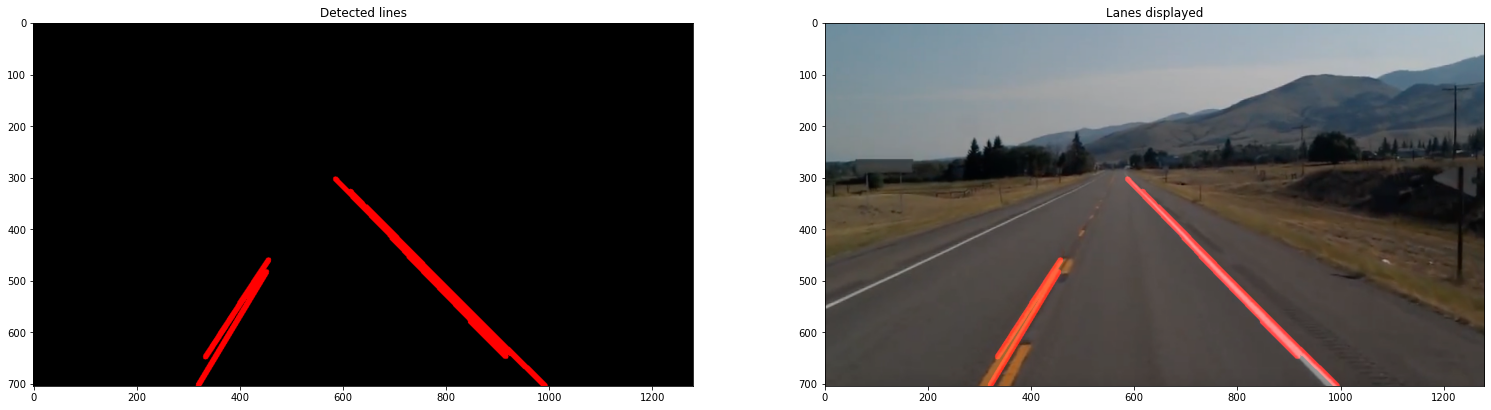

In [6]:
# Hough transform - HoughLinesP(image, rho, theta, threshold, array, minLineLength, maxLineGap)
lines = cv2.HoughLinesP(lanes_masked, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

line_image = displayLines(lanes, lines)
lane_lines = cv2.addWeighted(lanes, 0.8, line_image, 1, 1)

# plot figures
fig, (ax1, ax2) = plt.subplots(figsize = (26, 10), ncols = 2)
ax1.imshow(line_image, cmap='gray'), ax1.set_title("Detected lines")
ax2.imshow(lane_lines, cmap='gray'), ax2.set_title("Lanes displayed")
plt.show()


### Smooth lines


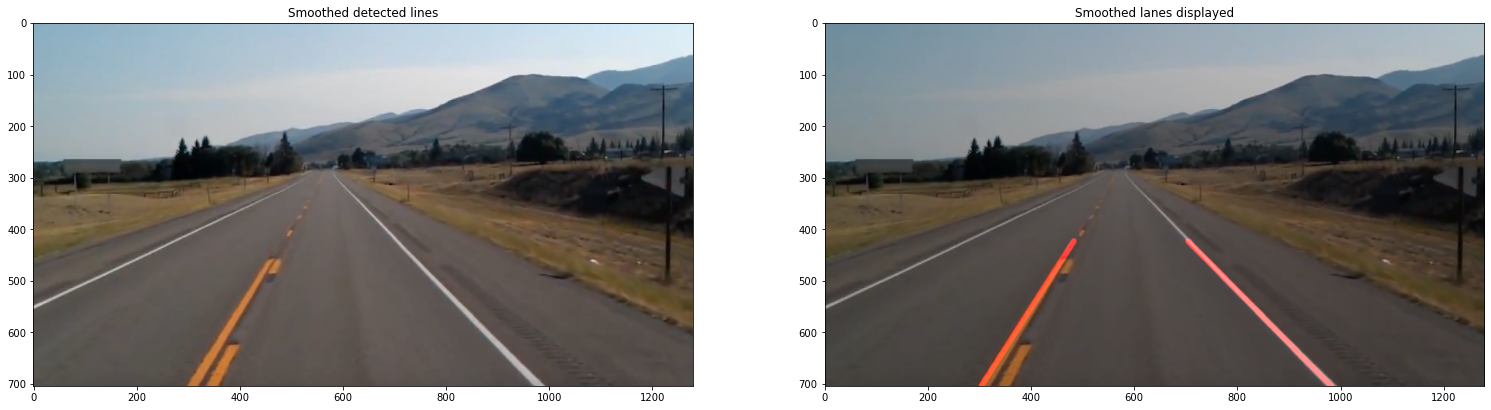

In [7]:
averaged_lines = averageSlopeIntercept(lanes, lines)
line_image_smoothed = displayLines(lanes, averaged_lines)
lane_lines_smoothed = cv2.addWeighted(lanes, 0.8, line_image_smoothed, 1, 1)

# plot figures
fig, (ax1, ax2) = plt.subplots(figsize = (26, 10), ncols = 2)
ax1.imshow(lanes, cmap='gray'), ax1.set_title("Smoothed detected lines")
ax2.imshow(lane_lines_smoothed, cmap='gray'), ax2.set_title("Smoothed lanes displayed")
plt.show()